<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/PracticaRegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre:
*   Matrícula:

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

#===============================================================================
# BIBLIOTECAS
#===============================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

#===============================================================================
# CARGAR ARCHIVO 'restaurantes.csv'
#===============================================================================

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/restaurantes.csv')

#===============================================================================
# PRIMERAS FILAS DEL DATAFRAME Y DESCRIPCIÓN ESTADÍSTICA
#===============================================================================

print('\n')

print(df.head())

print('\n')

print(df.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233


       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

  - Aproximadamente lineal, debido a que los puntos muestran una tendencia ascendente, pero los puntos se encuentran dispersos. Aun que no es una línea perfecta, los puntos siguen un patron ascendente.
  - La tendencia muestra que mientras mayor población mayores son las ganancias, aunque hay cierta dispersión por lo que se podría inferir que hay otros factores que influyen en las ganancias del restaurante.

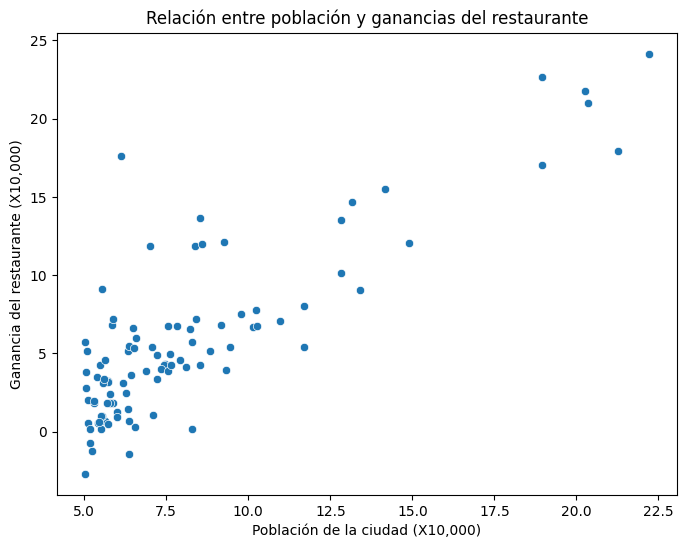

In [36]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['poblation'], y = df['profit'])
plt.title('Relación entre población y ganancias del restaurante')
plt.xlabel('Población de la ciudad (X10,000)')
plt.ylabel('Ganancia del restaurante (X10,000)')
plt.show()


### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
    - El coeficiente de correlación de Pearson tiene un valor de 0.8379, lo que indica una relación fuerte entre la población y la ganancia del restaurante.
- ¿Es positiva o negativa?
    - Positiva. Por lo que, a medida que la población de la ciudad aumenta, las ganancias del restaurante también tienden a aumentar.
- ¿Es coherente con el gráfico anterior?
    - Si, es coherente con el gráfico de dispersión. Aunque hay cierta dispersión en los datos, la mayoría de los puntos siguen un patrón positivo.

In [37]:
correlacion = df['poblation'].corr(df['profit'])

print(f'Coeficiente de correlación de Pearson: {correlacion:.4f}')


Coeficiente de correlación de Pearson: 0.8379


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
  - Intercepto = -3.8958. Lo que se interpreta que cuando la población es igual a 0, el modelo predice una ganancia de -3.8958.
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?
  - Pendiente = 1.1930. Cada vez que la población incremente una unidad la ganancia del restaurante aumenta 1.19 unidades (11,930)

In [38]:
#===============================================================================
# CONSTRUCCIÓN DEL MODELO DE REGRESIÓN LINEAL
#===============================================================================

X = df[['poblation']]
y = df['profit']
model = LinearRegression()
model.fit(X, y)

#===============================================================================
# COEFICIENTES
#===============================================================================

intercepto = model.intercept_
pendiente = model.coef_[0]

print(f'Intercepto: {intercepto:.4f}')
print(f'Coeficiente de regresión (pendiente): {pendiente:.4f}')







Intercepto: -3.8958
Coeficiente de regresión (pendiente): 1.1930


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

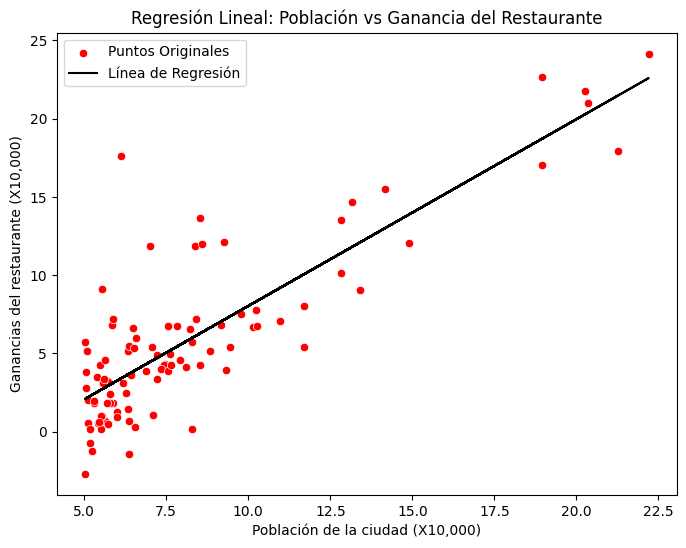

In [39]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = df['poblation'], y = df['profit'], label = 'Puntos Originales', color = 'red')
plt.plot(df['poblation'], model.predict(X), color = 'black', label = 'Línea de Regresión')
plt.title('Regresión Lineal: Población vs Ganancia del Restaurante')
plt.xlabel('Población de la ciudad (X10,000)')
plt.ylabel('Ganancias del restaurante (X10,000)')
plt.legend()


## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?
  - No, los residuos tienen un sesgo a la derecha lo que indica que los residuos tienen valores extremos positivos.

Text(0, 0.5, 'Frecuencia')

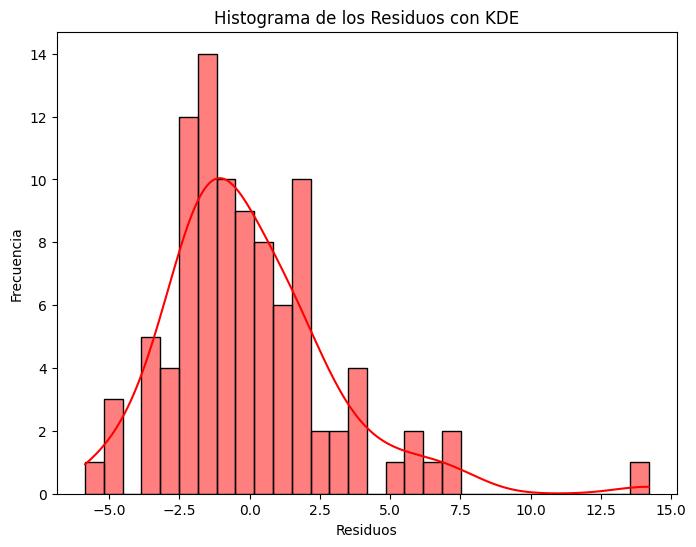

In [40]:
residuos = y - model.predict(X)

plt.figure(figsize = (8, 6))
sns.histplot(residuos, kde = True, bins = 30, color = 'red')
plt.title('Histograma de los Residuos con KDE')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')



### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?
  - Los residuos están distribuidos aleatoriamente. Por lo que podemos inferir que el supuesto de homocedasticidad se cumple.

Text(0, 0.5, 'Residuos')

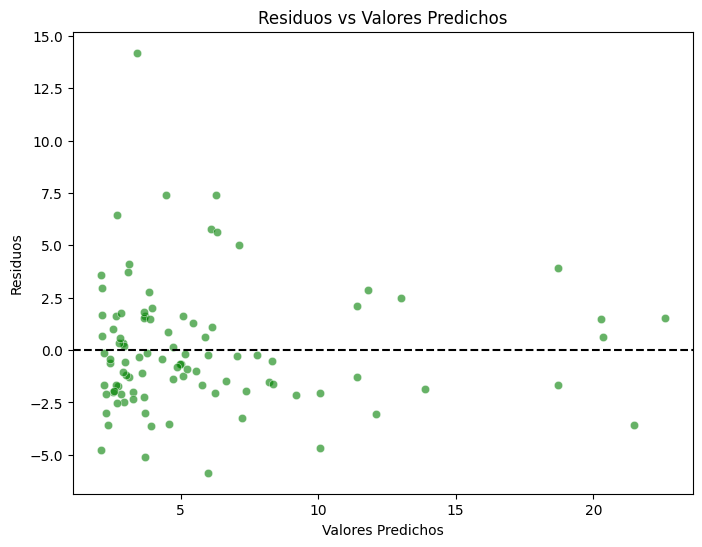

In [41]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = model.predict(X), y= residuos, color = 'green', alpha = 0.6)
plt.axhline(y = 0, color = 'black', linestyle = 'dashed')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')


### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.
  - Los residuos se alinean aproximadamente sobre la línea diagonal. Por lo que siguen una distribución normal, sin embargo en las colas hay una ligera desviación, por lo que los residuos podrían tener colas ligeramente más pesadas de lo esperado.

Text(0.5, 1.0, 'Q-Q Plot de los residuos')

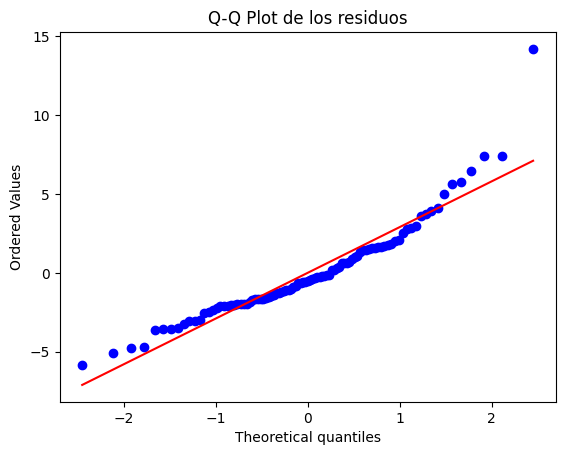

In [42]:
stats.probplot(residuos, dist = 'norm', plot = plt)
plt.title('Q-Q Plot de los residuos')

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?
  - Los valores de MSE y RMSE son relativamente bajos, por lo que podemos inferir que las predicciones del modelo son razonablemente precisas.
  - El R2 es de 70.20%, lo que significa que el modelo es capaz de explicar el 70.20% de la variabilidad en las ganancias en función de la población de la ciudad. Sin embargo, aún hay un 29.80% que no esta siendo explicado.

In [43]:
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f'MSE: {mse:.4f}')
print('\n')
print(f'RMSE: {rmse:.4f}')
print('\n')
print(f'R2: {r2:.4f}')


MSE: 8.9539


RMSE: 2.9923


R2: 0.7020


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
    
    - El modelo es útil. Explica más del 70% de la variabilidad de las ganancias, por lo que podemos tener una idea de como las ganancias del restaurante se relacionan con la población de la ciudad. Aún cuando el modelo es simple y como variable independiente solo contemos con la población. Sin embargo, es importante considerar que aproximadamente un 30% de la variabilidad de las ganancias no estan explicadas en el modelo.

- ¿Qué limitaciones encuentras?

  - El modelo solo considera una variable independiente (Población), y como se puede observar en el R2 las ganancias de un restaurante dependen de otros factores que no estan contemplados en el modelo.
  - El modelo está basado en distintos supuestos, como por ejemplo, normalidad en los residuos, homocedasticidad, etc. en caso de que estos supuestos no se cumplan completamente, podría ser un modelo que no sea tan preciso.

- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

  - Se realizó un ajuste y empeoraron las metricas del modelo, por lo que es mejor mantenerlo tal como esta.